#                       Mexico's COVID19 Data description and Analisys

<a href = 'https://coronavirus.gob.mx/datos/#DownZCSV'>
    <img align="center" src="https://i.imgur.com/EgVX1r8.png">
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as snn
import joblib
from datetime import datetime, timedelta
from collections import OrderedDict

# Data helper modules
from Covid_suite import Covid
from constants import *

In [2]:
database = {'confirmed'   : 'Casos_Diarios_Estado_Nacional_Confirmados_20200605.csv',
            'suspicious'  : 'Casos_Diarios_Estado_Nacional_Sospechosos_20200605.csv',
            'negatives'   : 'Casos_Diarios_Estado_Nacional_Negativos_20200605.csv',
            'deaths'      : 'Casos_Diarios_Estado_Nacional_Defunciones_20200605.csv',
            'patients'    : '200605COVID19MEXICO.csv'}
# Update the database by writing the url of the csv's and running the update_data @classmethod:
Covid.update_data(database)

### This notebook revolves around the Covid class.
Each object of the Covid class correspond to a Mexican State.  
Here is a list of the states:

In [3]:
patients_codes['states']

{1: 'AGUASCALIENTES',
 2: 'BAJA CALIFORNIA',
 3: 'BAJA CALIFORNIA SUR',
 4: 'CAMPECHE',
 5: 'COAHUILA',
 6: 'COLIMA',
 7: 'CHIAPAS',
 8: 'CHIHUAHUA',
 9: 'DISTRITO FEDERAL',
 10: 'DURANGO',
 11: 'GUANAJUATO',
 12: 'GUERRERO',
 13: 'HIDALGO',
 14: 'JALISCO',
 15: 'MEXICO',
 16: 'MICHOACAN',
 17: 'MORELOS',
 18: 'NAYARIT',
 19: 'NUEVO LEON',
 20: 'OAXACA',
 21: 'PUEBLA',
 22: 'QUERETARO',
 23: 'QUINTANA ROO',
 24: 'SAN LUIS POTOSI',
 25: 'SINALOA',
 26: 'SONORA',
 27: 'TABASCO',
 28: 'TAMAULIPAS',
 29: 'TLAXCALA',
 30: 'VERACRUZ',
 31: 'YUCATAN',
 32: 'ZACATECAS',
 36: 'Nacional',
 97: 'not apply',
 98: 'unknown',
 99: 'not specified'}

## General methods for Covid objects:

<img align="left" src="https://i.imgur.com/GWsSa5Y.png">

##  _ _init_ _()

#### Contains just the name of the state:
mexico_city = Covid('cdmx')

In [4]:
mexico_city = Covid('cdmx')
print(mexico_city)

Data for DISTRITO FEDERAL,
state code: 9,
population: 9018645


### population()
This returns the population of the state:

In [5]:
mexico_city.population()

9018645

## discrete() and cummulative()

This are two different formats for the data contain in the 'confirmed', 'suspicious', 'deaths' and 'negative' databases.  
Those are the data_type parameter that pass to the method:

#### Mexico city confirmed cases in discrete format:

In [6]:
mexico_city.discrete('confirmed')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 3, 12, 17, 24, 21, 10,
       26, 34, 31, 39, 24, 12, 11, 25, 34, 25, 51, 39, 49, 35, 77, 51, 55,
       71, 79, 56, 54, 117, 127, 125, 127, 147, 112, 115, 267, 246, 225,
       248, 328, 197, 186, 439, 429, 398, 342, 503, 243, 221, 477, 533,
       561, 512, 322, 321, 285, 702, 575, 672, 673, 768, 379, 329, 755,
       771, 847, 739, 837, 490, 346, 943, 919, 916, 886, 793, 379, 292,
       907, 791, 867, 732, 784, 419, 269, 744, 584, 286, 58, 3],
      dtype=object)

#### Mexico city confirmed cases in cummulative format:

In [7]:
mexico_city.cummulative('confirmed')

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     3,     3,     3,     3,     4,     4,     4,     5,
           5,     6,     7,     7,    10,    22,    39,    63,    84,
          94,   120,   154,   185,   224,   248,   260,   271,   296,
         330,   355,   406,   445,   494,   529,   606,   657,   712,
         783,   862,   918,   972,  1089,  1216,  1341,  1468,  1615,
        1727,  1842,  2109,  2355,  2580,  2828,  3156,  3353,  3539,
        3978,  4407,  4805,  5147,  5650,  5893,  6114,  6591,  7124,
        7685,  8197,  8519,  8840,  9125,  9827, 10402, 11074, 11747,
       12515, 12894, 13223, 13978, 14749, 15596, 16335, 17172, 17662,
       18008, 18951,

### actives()
Actives calculates the record of active Covid19 patients.  
It uses a default window of 14 days for infection.
Since this process could be slow depending of the hardware,  
active data is store in pkl files by joblib in the '/tmp' folder.  
So the first time will take more time to calculate.

In [8]:
mexico_city.actives(window = 14)

,actives
dates,
2020-02-22,1
2020-02-23,2
2020-02-24,2
2020-02-25,2
2020-02-26,2
...,...
2020-06-01,6852
2020-06-02,6294
2020-06-03,5319


### patients()
This method creates an instance of the inner class **Patients()**  
We'll see it later.

## Plotting general data

<img align="left" src="https://i.imgur.com/4Hcy8uk.png">

### plot_cummulative()

**Data** can be a single instance of: cummulative(data_type)  
or a **list** of several: [ cummulative(data_type1), cummulative(data_type2) ]    
If data is a list then **names** should also be a list of strings with the same length.  
**trim** sets the initial x_axis since usually the first days of data are empty

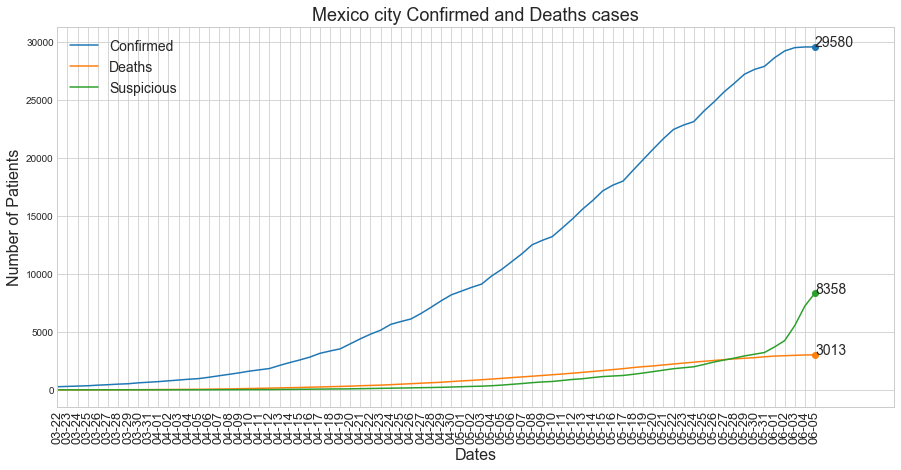

In [9]:
Covid.plot_cummulative(data  =[Covid('cdmx').cummulative('confirmed'),
                               Covid('cdmx').cummulative('deaths'),
                               Covid('cdmx').cummulative('suspicious')],
                       names =['Confirmed', 'Deaths', 'Suspicious'],
                       title = 'Mexico city Confirmed and Deaths cases',
                       trim  = 70)

### plot_discrete()
Same especifications as the other one.

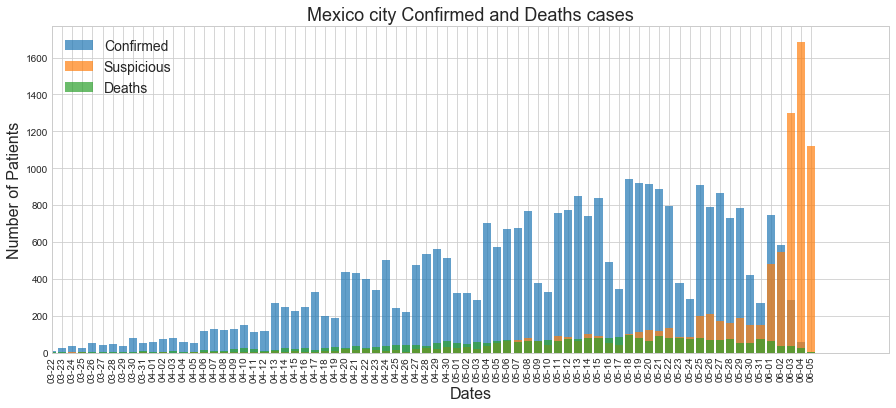

In [10]:
Covid.plot_discrete(data  =[Covid('cdmx').discrete('confirmed'),
                            Covid('cdmx').discrete('suspicious'),
                            Covid('cdmx').discrete('deaths')],
                       names =['Confirmed', 'Suspicious','Deaths'],
                       title = 'Mexico city Confirmed and Deaths cases',
                       trim = 70)

### plot_actives()
Same especifications as the precious two methods.

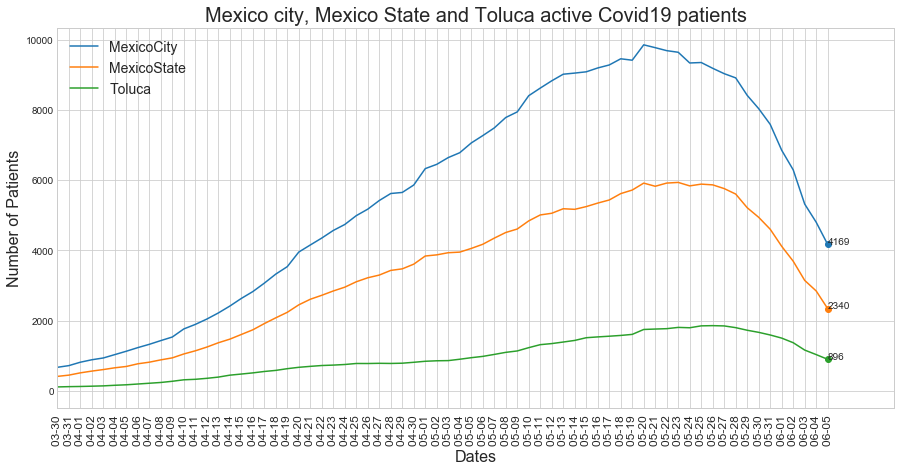

In [11]:
Covid.plot_actives(data  =[Covid('cdmx').actives(),
                           Covid('MEXICO').actives(),
                           Covid('TABASCO').actives()],
                           names =['MexicoCity','MexicoState', 'Toluca'],
                           title = 'Mexico city, Mexico State and Toluca active Covid19 patients',
                           trim = 40)

### Getting several databases at once
<img align="left" src="https://i.imgur.com/W1Rv0c4.png">

### get_max_to_min()
This function returns an ordered dictionary with data from all states.  
**dtype** could be: 'active', 'deaths', 'suspicious', 'confirmed' or 'negative'  
By default National data is ommited since it is much bigger than any other, to include it set **include_national** to True  
To return the databases ordered from min to max set **max_to_min** to False

In [12]:
deaths_max_to_min = Covid.get_max_to_min('deaths')
deaths_max_to_min

OrderedDict([('DISTRITO FEDERAL', 3013),
             ('MEXICO', 2185),
             ('BAJA CALIFORNIA', 1186),
             ('VERACRUZ', 741),
             ('SINALOA', 667),
             ('TABASCO', 625),
             ('PUEBLA', 509),
             ('QUINTANA ROO', 411),
             ('CHIHUAHUA', 377),
             ('HIDALGO', 367),
             ('GUERRERO', 358),
             ('MORELOS', 294),
             ('MICHOACAN', 219),
             ('OAXACA', 218),
             ('JALISCO', 207),
             ('YUCATAN', 205),
             ('SONORA', 190),
             ('CHIAPAS', 185),
             ('TLAXCALA', 182),
             ('GUANAJUATO', 135),
             ('TAMAULIPAS', 130),
             ('QUERETARO', 126),
             ('NUEVO LEON', 111),
             ('COAHUILA', 92),
             ('CAMPECHE', 86),
             ('NAYARIT', 81),
             ('SAN LUIS POTOSI', 62),
             ('DURANGO', 48),
             ('AGUASCALIENTES', 46),
             ('ZACATECAS', 44),
             ('BAJA

### plot_max_to_min()
This method plots max to min data, trough the plot_cummulative() or plot_actives() methods.  
**n** it's the number of states to plot

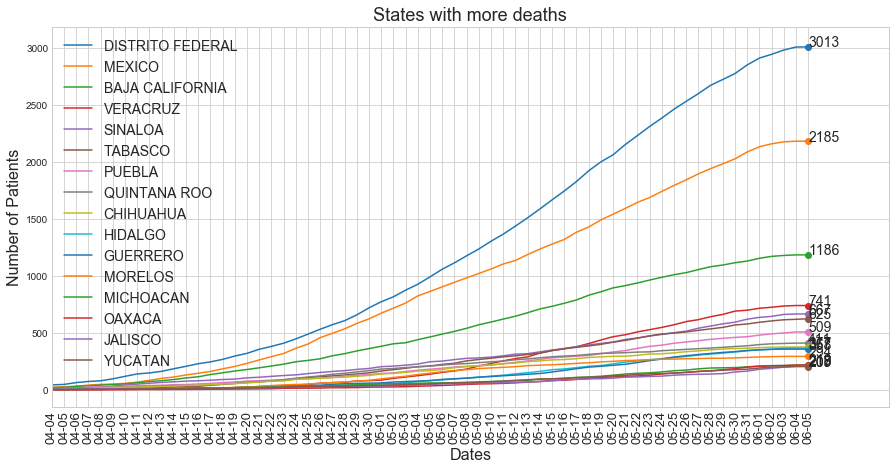

In [13]:
Covid.plot_max_to_min('deaths', n = 16, title = 'States with more deaths',trim = 60)

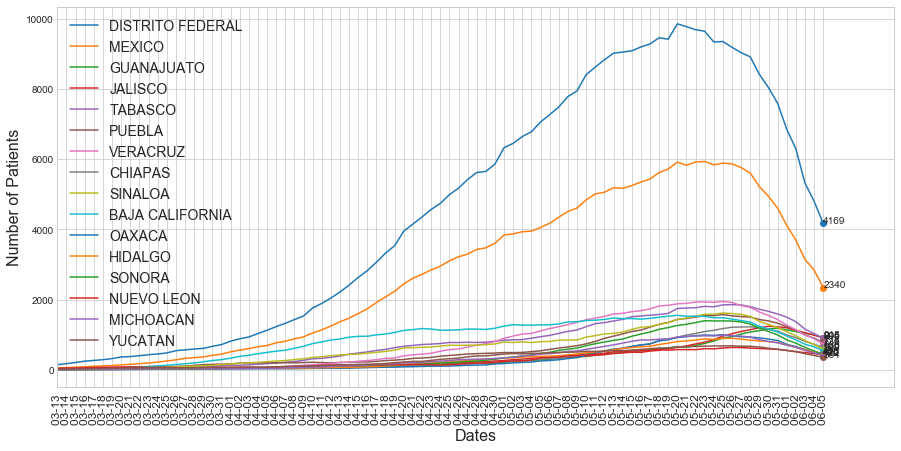

In [14]:
Covid.plot_max_to_min('actives', n = 16, title = 'States with more active patients of Covid19',trim = 60)

## Patients() inner class:

This class creates an instance for each state from the patients database:  
<img align="left" src="https://i.imgur.com/eLKZ9De.png">

In [15]:
mexico_city_patients = Covid('cdmx').patients()
mexico_city_patients.data.head()

,Updated_at,id,origin,sector,treated_at,sex,borne_at,lives_at,pacient_type,admission_date,...,cardiovascular,obesity,kidney_disease,smoker,close_to_infected,result,migrant,nationality,country_of_origin,icu
5,2020-06-05,015f76,2,4,9,1,9,9,1,2020-05-04,...,2,2,2,2,99,1,99,MÃ©xico,99,97
7,2020-06-05,0c46ec,2,4,15,2,9,9,1,2020-04-15,...,2,2,2,2,99,1,99,MÃ©xico,99,97
9,2020-06-05,127b6a,2,4,9,1,15,9,1,2020-04-20,...,2,2,2,2,99,1,99,MÃ©xico,99,97
10,2020-06-05,190ec6,2,4,15,1,9,9,1,2020-04-22,...,2,2,2,2,99,1,99,MÃ©xico,99,97
15,2020-06-05,057e68,2,4,9,2,15,9,2,2020-04-03,...,2,2,1,2,99,1,99,MÃ©xico,99,2


### Patients objects has filter methods:
<img align="left" src="https://i.imgur.com/ONpnqbv.png">

In [16]:
mexico_city_women    =  Covid('cdmx').patients().women()
mexico_city_man      =  Covid('cdmx').patients().men()
mexico_city_ages_12_to_45 = Covid('cdmx').patients().age(12,45)

### Filters can be chained together:

#### Women alive, from Mexico City, between 20 and 45

In [17]:
MexicoCity_women_not_infected_alive_between_20_and_45 = Covid('cdmx').patients().women().not_infected().alive().age(start = 20, end = 45)

print(MexicoCity_women_not_infected_alive_between_20_and_45)

MexicoCity_women_not_infected_alive_between_20_and_45.data.age.values[:10]

10342 Patients data from: DISTRITO FEDERAL


array([28, 34, 31, 31, 26, 34, 39, 44, 37, 38], dtype=int64)

#### Men dead from Mexico City, between 60 and 80

In [18]:
MexicoCity_men_dead_between_60_and_80 = Covid('cdmx').patients().men().deaths().age(start = 60, end = 80)

print(MexicoCity_men_dead_between_60_and_80)

MexicoCity_men_dead_between_60_and_80.data.age.values[:10]

1193 Patients data from: DISTRITO FEDERAL


array([72, 75, 60, 78, 69, 61, 64, 76, 66, 61], dtype=int64)

### Patients object has also descriptors:
<img align="left" src="https://i.imgur.com/NwvVuHy.png">

### describe()
This method returns an pandas df with the proportions for illness, sex, deaths and infection for the data population

In [19]:
MexicoCity_women_not_infected_alive_between_20_and_45.describe()

,features,frequency,%
0,patients,10342,--
1,covid19+,0,0
2,covid19-,10342,100
3,wainting for covid test,0,0
4,women,10342,100
5,men,0,0
6,deaths,0,0
7,intubated,17,0.16
8,pneumonia,394,3.81
9,pregnancy,201,1.94


In [20]:
MexicoCity_men_dead_between_60_and_80.describe()

,features,frequency,%
0,patients,1193,--
1,covid19+,906,75.94
2,covid19-,204,17.1
3,wainting for covid test,83,6.96
4,women,0,0
5,men,1193,100
6,deaths,1193,100
7,intubated,253,21.21
8,pneumonia,873,73.18
9,pregnancy,0,0


### illness()
This method creates a DataFrame with just the illness, age and sex columns.  
**age** is normalized with the whole population  
**sex** 0 == Women 1 == Men  
For every **illness** else 0 == Non present 1 == Present

In [21]:
MexicoCity_women_not_infected_alive_between_20_and_45.illness().head()

,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,kidney_disease,smoker,sex,age
110081,0,0,0,0,0,0,0,0,0,0,0.233333
110101,0,0,0,0,0,0,0,0,0,0,0.283333
110133,0,0,0,0,0,0,0,0,0,0,0.258333
110144,0,0,0,0,0,0,0,0,0,0,0.258333
110154,0,0,0,0,0,0,0,0,0,0,0.216667


In [22]:
MexicoCity_men_dead_between_60_and_80.illness().head()

,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,kidney_disease,smoker,sex,age
15,1,0,0,0,1,0,0,1,0,1,0.600
162,0,0,0,0,0,1,0,0,0,1,0.625
164,0,0,0,0,0,0,0,0,0,1,0.500
316,0,0,0,0,1,0,0,0,0,1,0.650
319,1,0,0,0,0,1,0,0,0,1,0.575


### There is also a method to plot the general illness in the entire population:

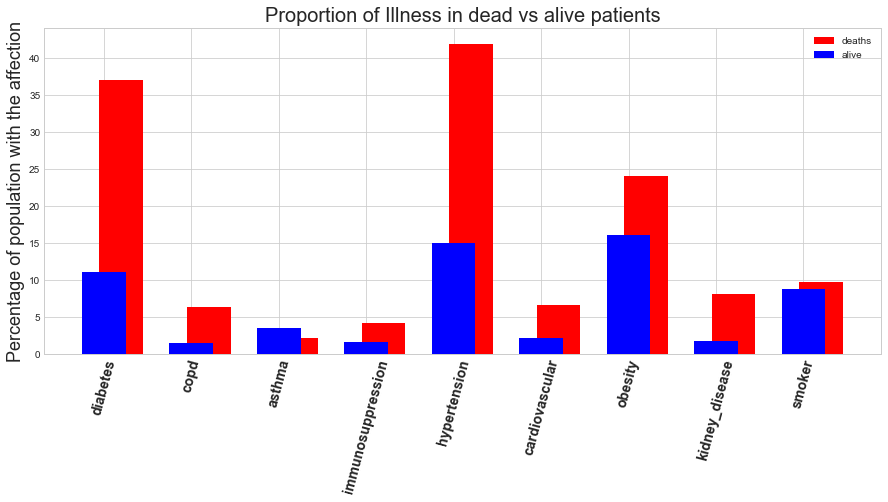

In [23]:
Covid('all').patients().plot_illness()

### sectors()
This method plots the different institutions that takes or took care of the subset of patients.

Mexico institutions that took or take care of patients: 


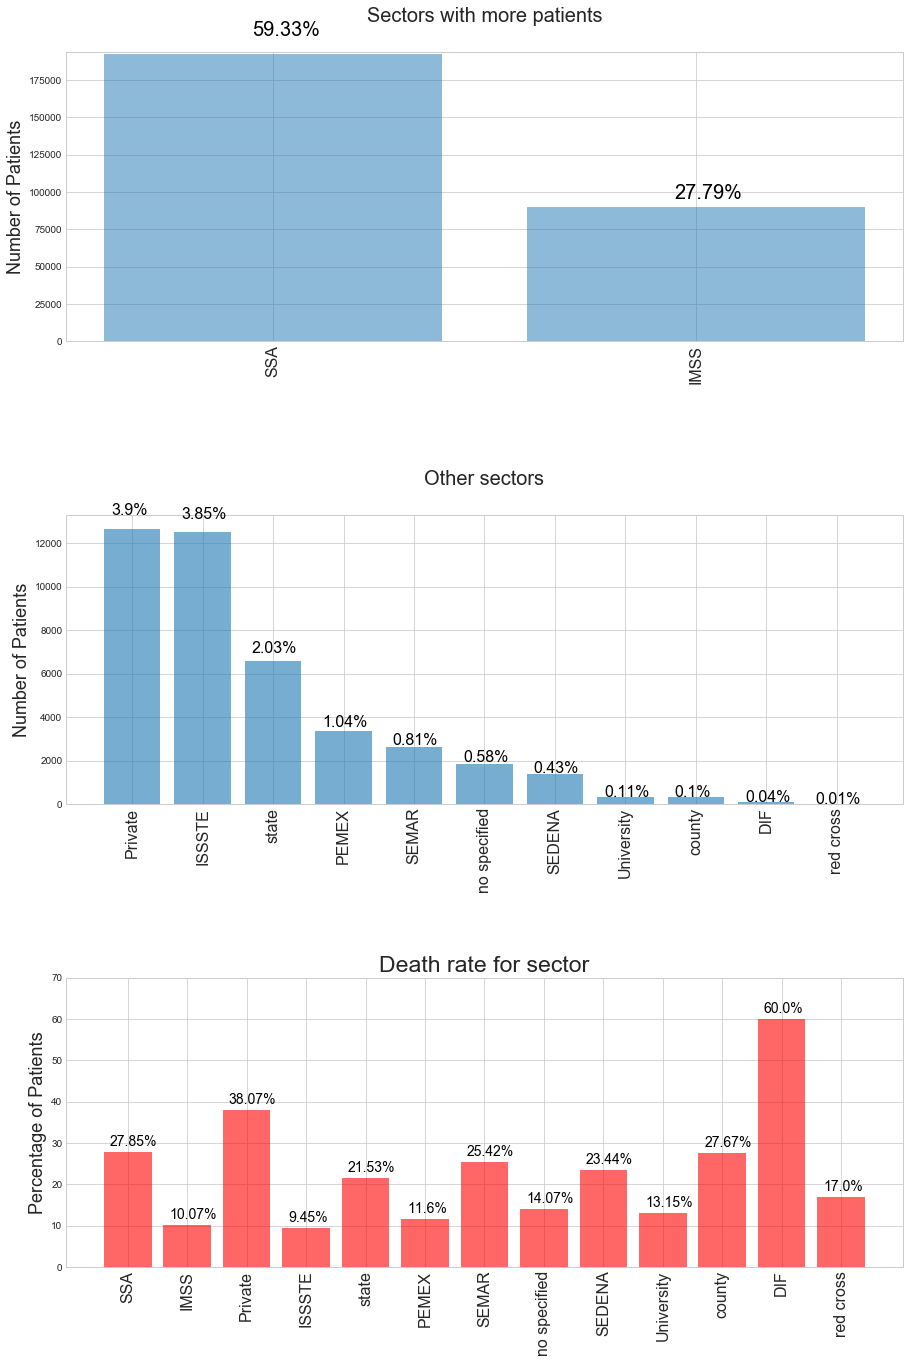

In [24]:
print('Mexico institutions that took or take care of patients: ')
Covid('all').patients().sectors()

## Regressor:

So I tried to train a regressor to predict the probability of diying by passing the illness, age and sex of a particular patient.  
I didn't work for the reason that every combination of illness, age and sex on dead patients exist also on the survivors, so the features that can predict the deceased for covid19 are not in the database:

In [25]:
covid19_deads = Covid('all').patients().deaths().infected().illness().values
covid19_survivors = Covid('all').patients().alive().infected().illness().values

print('Covid19 dead patients: ',len(covid19_deads))

same_data = 0
for patient in covid19_deads:
    if patient in covid19_survivors:
        same_data += 1
print('Number of survivor patients that has the same data that dead ones: ', same_data)

Covid19 dead patients:  13170
Number of survivor patients that has the same data that dead ones:  13170


### Anyway you can train a classifier just for fun:

Starting preprocess of X_train, X_test, y_train, y_test...
###############
Preprocess done...
###############
X_train: 217680
X_test: 107217
Deaths on train set: 12391
Deaths on test set: 6084
###############
###############
Training the model...
###############
Predicting the Test set: 
###############
Confusion Matrix: 
[ Alive   Dead]
[[101032    101]
 [  6059     25]]
###############
Calculating the ROC curves: 
###############
No Skill: ROC AUC=0.500
Model: ROC AUC=0.833


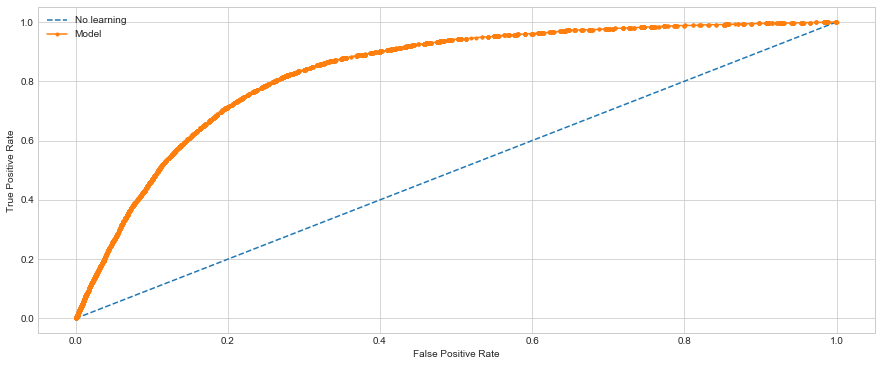

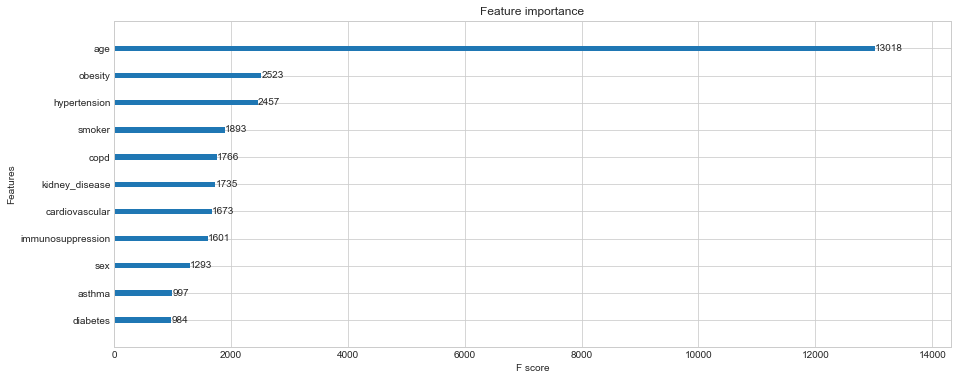

In [26]:
model = Covid.xgboost_classifier()

### We can see that the model basically just guess that everyone is alive.
Conclusion: We need more meaningful data to make a regressor or classifier.